# Granger method vs. Phase-Slope-Index

Here we attempt at reproducing the *Figure 1* of [Nolte et al. 2008](http://link.aps.org/abstract/PRL/v100/e234101)


### Acknowledgement
This work was funded by the German Federal Ministry of Education and Research ([BMBF](https://www.bmbf.de/)) in the project ALICE III under grant ref. 01IS18049B.

### Reference
*Robustly Estimating the Flow Direction of Information in Complex Physical Systems* paper, by *Guido Nolte, Andreas Ziehe, Vadim V. Nikulin, Alois Schlögl, Nicole Krämer, Tom Brismar, and Klaus-Robert Müller*, ([Nolte et al. 2008](http://link.aps.org/abstract/PRL/v100/e234101)).

### Load packages

In [1]:
using TimeSeriesCausality
using Distributions: MvNormal
using Plots: plot, bar

### Unidirectional flux with white noise
- channel 1 is the causal (independent) time series
- channel 2 is the effect (dependent) time series

parameters

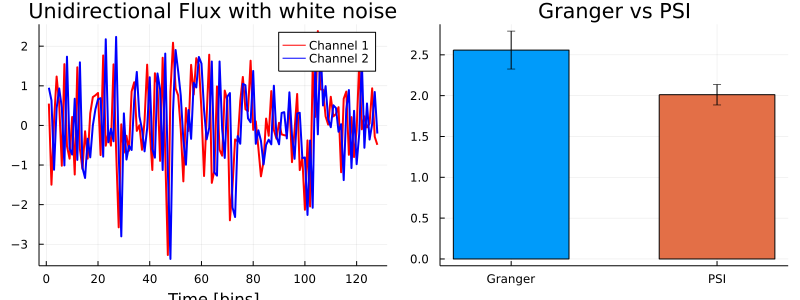

In [2]:
order = 1
n_samples = 1024  # number of data points per channel
segment_length = 128
epoch_length = 128
noise_scale = 0.25
plot_slice=128

# data generation
rand_data = randn(Float64, (n_samples + order))
signal = zeros(Float64, (n_samples, 2))
white_noise = noise_scale * randn(n_samples, 2)
signal[:, 1] = rand_data[order+1:end]
signal[:, 2] = rand_data[1:n_samples]
signal += white_noise

# Causal estimation
psi, psi_std = psi_est(signal, segment_length; method="jackknife", eplen=epoch_length)
granger_idx, err_std = granger_est(signal, segment_length; method="jackknife")

p1 = plot(
    1:plot_slice,
    signal[1:plot_slice, :];
    title="Unidirectional Flux with white noise",
    label=["Channel 1" "Channel 2"],
    linecolor=["red" "blue"],
    xlabel="Time [bins]",
    lw = 2,
);
p2 = bar(
    ["Granger" "PSI"],
    [psi[1, 2] granger_idx];
    title="Granger vs PSI",
    yerror=[psi_std[1, 2] err_std],
    legend=false
);
plot(p1, p2; layout=(1, 2), size=(800, 300))

### Pink (correlated) noise

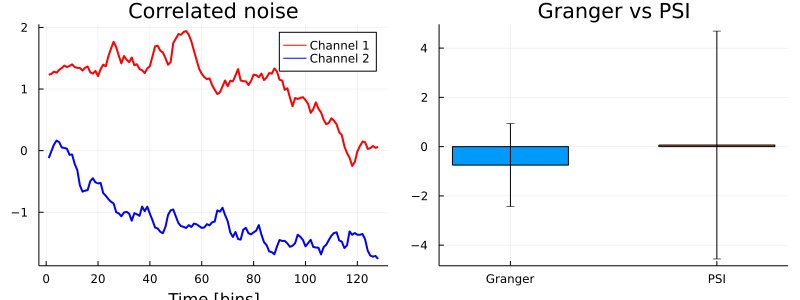

In [3]:
# data generation
signal = zeros(Float64, (n_samples, 2))
signal[:, 1] = TimeSeriesCausality.pink_noise(n_samples, 1.0)
signal[:, 2] = TimeSeriesCausality.pink_noise(n_samples, 1.0)

# Causal estimation
psi, psi_std = psi_est(signal, segment_length; method="jackknife", eplen=epoch_length)
granger_idx, err_std = granger_est(signal, segment_length; method="jackknife")

p1 = plot(
    1:plot_slice,
    signal[1:plot_slice, :];
    title="Correlated noise",
    label=["Channel 1" "Channel 2"],
    linecolor=["red" "blue"],
    xlabel="Time [bins]",
    lw = 2,
);
p2 = bar(
    ["Granger" "PSI"],
    [psi[1, 2] granger_idx];
    title="Granger vs PSI",
    yerror=[psi_std[1, 2] err_std],
    legend=false
);
plot(p1, p2; layout=(1, 2), size=(800, 300))

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*